In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

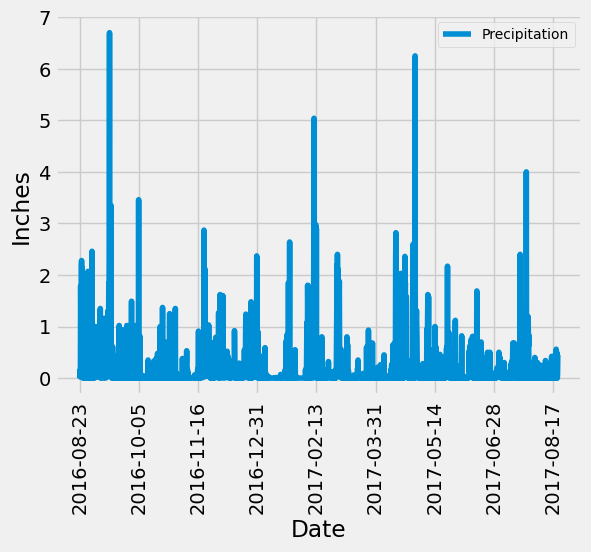

In [21]:
# Find the most recent date in the data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=366)

# Perform a query to retrieve the date and precipitation scores (working with actual data)
rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column 
precipitation_df = pd.DataFrame(rain_results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df = precipitation_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot().get_figure()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig("Output/Precipitation_last_12months.png")
plt.xticks(rotation=90)
plt.legend(loc="upper right", fontsize=10)

plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

NameError: name 'df' is not defined

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).distinct().count()

9

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                  order_by(func.count(Measurement.station).desc()).\
                  group_by(Measurement.station).\
                  all()

# --- display the active stations ---
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# --- identify most active station ---
most_active_station = active_stations[0][0]
print (f"The most active station is {most_active_station}.")
print("***************************************")

# --- calculate lowest temp recorded at the most active station USC00519281 ---
lowest_temp = session.query(func.min(Measurement.tobs)).\
              filter(Measurement.station == most_active_station).scalar()
              
print(f"Lowest temperature: {lowest_temp} degrees Fahrenheit.")

# --- calculate highest temp recorded at the most active station USC00519281 ---
highest_temp = session.query(func.max(Measurement.tobs)).\
              filter(Measurement.station == most_active_station).scalar()

print(f"Highest temperature: {highest_temp} degrees Fahrenheit.")

# --- calculate average temp recorded at the most active station USC00519281 ---
avg_temp = session.query(func.avg(Measurement.tobs)).\
              filter(Measurement.station == most_active_station).scalar()

print(f"Average temperature: {round(avg_temp, 2)} degrees Fahrenheit.")

The most active station is USC00519281.
***************************************
Lowest temperature: 54.0 degrees Fahrenheit.
Highest temperature: 85.0 degrees Fahrenheit.
Average temperature: 71.66 degrees Fahrenheit.


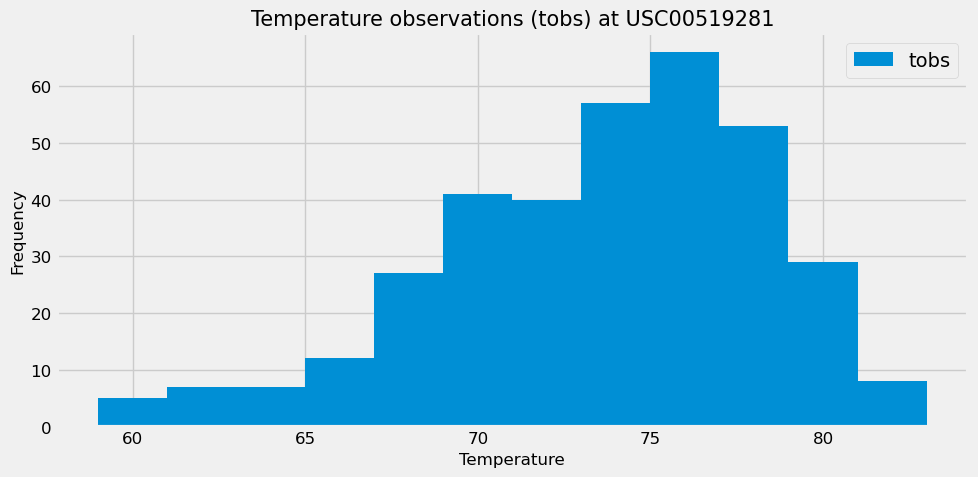

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs = pd.DataFrame(session.query(Measurement.tobs).\
                                filter((Measurement.station == most_active_station)\
                                        & (Measurement.date >= date_oneyearago)\
                                        & (Measurement.date <= last_dt)).all())

most_active_tobs.plot(kind="hist", figsize=(10,5), bins=12, legend=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Temperature observations (tobs) at {most_active_station}", fontsize=15)

plt.tight_layout()
plt.savefig("Output/tobs.png")
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()